# Introduction
Supervised learning problems can be further grouped into

Regression problems and

Classification problems

In classification, learning algorithms takes the input data and map the output to a discrete output like True or False In regression, learning algorithms maps the input data to continuous output like weight, cost, etc.

In this project I will apply regression techniques of supervised learning to predict the medical insurance costs.

# Data Exploration

Dataset consists of 1338 records. Each record contains the below data for specific person.


age – Age of the person

sex – Sex of the person

bmi – Body Mass Index(BMI) of the person

children – Number of children for the person

smoker – Smoking status of the person

region – Region of the person in US

charges – Medical Insurance costs per year for the person

# Importing Required library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Data Collection & Analysis

In [5]:
# Loading data sets
df= pd.read_csv("C:\\Insurance\\insurance.csv")

In [6]:
# To see first 5 rows of datasets
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.shape

(1338, 7)

In [8]:
# # Getting some informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:

Sex

Smoker

Region

In [9]:
# checking for missing values
df.isnull().sum().sum()

0

# Data Analysis

In [10]:
# statistical Measures of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


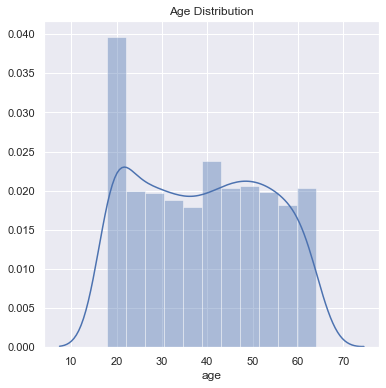

In [11]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

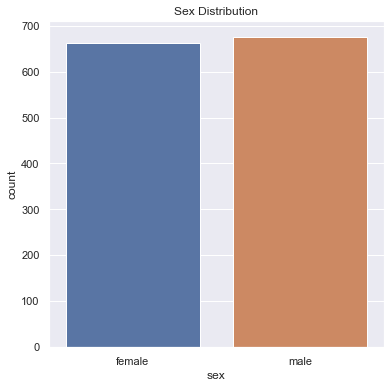

In [12]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

In [13]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

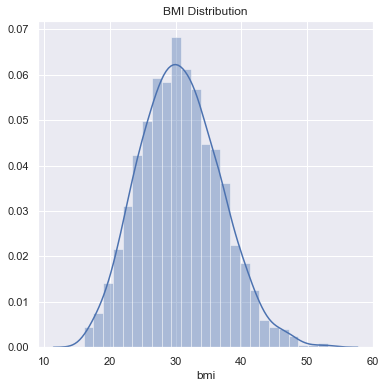

In [14]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

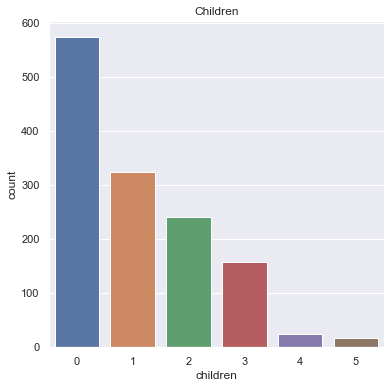

In [15]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

In [16]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

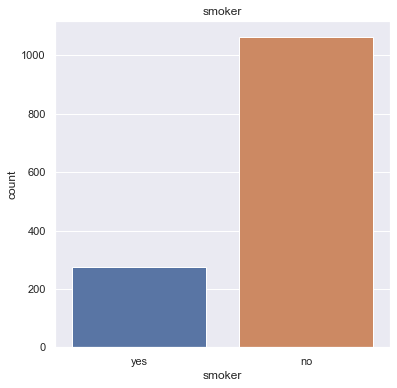

In [17]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

In [18]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

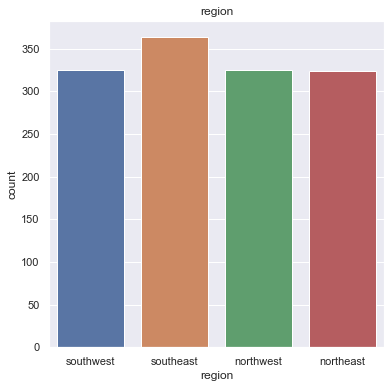

In [19]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

In [20]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

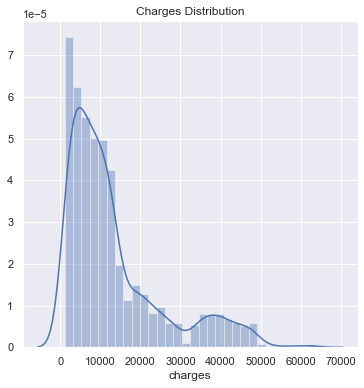

In [21]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

# Data Pre-Processing

Encoding the categorical features

In [22]:
# encoding sex column
df.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

# Splitting the Features and Target

In [24]:
X =df.drop(columns='charges', axis=1)
Y =df['charges']

In [25]:
# Splitting the data into Training data & Testing Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Model Training

In [26]:
# loading the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

# Model Evaluation

In [27]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [28]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


In [29]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [30]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684077


# Building a Predictive System

In [31]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3760.0805765]
The insurance cost is USD  3760.0805764960487
